<a href="https://colab.research.google.com/github/kibrus/Emotion-detector/blob/main/CNN_Emotion_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setup and load data

1.1 Install Dependencies and setups

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.14.0.32.55
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

Extracting the zip file

In [5]:
import zipfile
import os
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the folder where your zip files are located in Google Drive
zip_folder_path = '/content/drive/MyDrive/Data/Imageclassification'

# Step 3: List of zip files to extract
zip_files = ['happy.zip', 'sad.zip']

# Step 4: Loop through each zip file and extract it to a corresponding folder
for zip_file in zip_files:
    # Full path to the zip file
    zip_path = os.path.join(zip_folder_path, zip_file)

    # Destination folder (based on the zip file name, e.g., 'happy' or 'sad')
    extract_to_path = os.path.join('/content/data', zip_file.split('.')[0])

    # Check if the file exists before extracting
    if os.path.exists(zip_path):
        # Create the destination folder if it doesn't exist
        if not os.path.exists(extract_to_path):
            os.makedirs(extract_to_path)

        # Extract the zip file into the corresponding folder
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path)  # Extract into the specified folder
        print(f"Files from {zip_file} extracted successfully to {extract_to_path}")
    else:
        print(f"File not found: {zip_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files from happy.zip extracted successfully to /content/data/happy
Files from sad.zip extracted successfully to /content/data/sad


In [6]:
!ls /content/drive/MyDrive/Data/Imageclassification

happy.zip  sad.zip


1.2 Remove dodgy images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data'

In [9]:
image_exts = ['jpeg', 'gif', 'bmp', 'png']

In [10]:
# Iterate through all files in the dataset and remove invalid images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Try to read the image using OpenCV
            img = cv2.imread(image_path)

            # Check if it's a valid image file using imghdr
            tip = imghdr.what(image_path)

            # If the image type is not in the allowed extensions, remove the file
            if tip not in image_exts:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with Image {image_path}: {e}")

Image not in ext list data/happy/traitshappypeople.jpg
Image not in ext list data/happy/smiling-young-african-american-woman-260nw-2290057229.jpg
Image not in ext list data/happy/handsome-happy-african-american-bearded-260nw-2460702995.jpg
Image not in ext list data/happy/smiling-woman_W6GFOSFAXA.jpg
Image not in ext list data/happy/group-happy-smiling-people-chat-260nw-2299728955.jpg
Image not in ext list data/happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
Image not in ext list data/happy/businesswoman-giving-high-five-male-260nw-2226244055.jpg
Image not in ext list data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data/happy/Happy20People.jpg
Image not in ext list data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list data/sad/1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in ext list data/sad/sad-man-260nw-82004164.jpg
Image not in ext list data/sad/depositphotos_36254119-stock-photo-desperate-sad-peop

1.3 Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#building data pipe line
data = tf.keras.utils.image_dataset_from_directory('data')

Found 381 files belonging to 2 classes.


In [191]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Since the data file is not loaded into memory, we need to use the numpy_iterator to access the data.

In [13]:
#alowing as to loop through it
data_iterator = data.as_numpy_iterator()

In [14]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7fb6bd3548e0>)

In [15]:
#grabing one batch back
batch = data_iterator.next()
batch

(array([[[[ 24.394531 ,  35.39453  ,  37.39453  ],
          [ 23.01587  ,  34.01587  ,  36.01587  ],
          [ 24.628418 ,  35.628418 ,  37.628418 ],
          ...,
          [ 16.375    ,  30.6875   ,  33.6875   ],
          [ 15.628662 ,  29.628662 ,  32.628662 ],
          [ 16.033936 ,  27.033936 ,  31.033936 ]],
 
         [[ 22.914307 ,  33.914307 ,  35.914307 ],
          [ 21.11792  ,  32.11792  ,  34.11792  ],
          [ 24.057373 ,  35.057373 ,  37.057373 ],
          ...,
          [ 17.119873 ,  31.432373 ,  34.432373 ],
          [ 16.698486 ,  30.698486 ,  33.698486 ],
          [ 17.       ,  28.       ,  32.       ]],
 
         [[ 25.652344 ,  36.652344 ,  38.652344 ],
          [ 23.902344 ,  34.902344 ,  36.902344 ],
          [ 26.       ,  37.       ,  39.       ],
          ...,
          [ 18.178955 ,  32.491455 ,  35.491455 ],
          [ 17.76831  ,  31.76831  ,  34.76831  ],
          [ 18.044678 ,  29.044678 ,  33.044678 ]],
 
         ...,
 
         [[ 

In [16]:
#batch have 2 parts or length. The first part is images and labels
len(batch)

2

In [17]:
batch[0].shape

(32, 256, 256, 3)

In [18]:
#lable
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

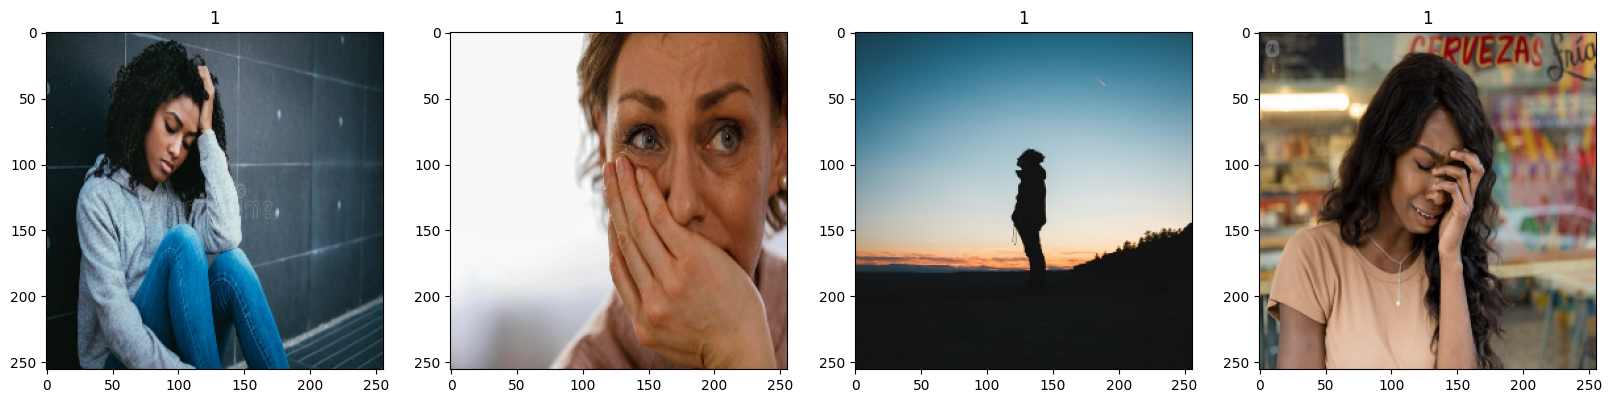

In [19]:
#check labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# sad - 1,  happy - 0

#2, preprocess Dat

2.1 Scale Data

In [20]:
data = data.map(lambda x, y: (x/255, y))

In [204]:
for x_batch, y_batch in data.take(1):
    # Print the pixel values of the first image in the batch
    print("First image pixel values:", x_batch[0].numpy())  # Convert to numpy for easy viewing
    print("First image label:", y_batch[0].numpy())

First image pixel values: [[[0.         0.36283702 0.7514859 ]
  [0.00248162 0.31744793 0.7158088 ]
  [0.02231924 0.31928614 0.72898287]
  ...
  [0.94509804 0.9607843  0.9647059 ]
  [0.9477788  0.9634651  0.96738666]
  [0.9490196  0.9647059  0.96862745]]

 [[0.         0.36800265 0.7566515 ]
  [0.00361095 0.3215818  0.7182487 ]
  [0.02400626 0.32181668 0.72898287]
  ...
  [0.94509804 0.9607843  0.9647059 ]
  [0.9477788  0.9634651  0.96738666]
  [0.9490196  0.9647059  0.96862745]]

 [[0.         0.37562805 0.7636329 ]
  [0.00519104 0.327744   0.7223825 ]
  [0.02655649 0.32575664 0.7300825 ]
  ...
  [0.94490826 0.96059453 0.9645161 ]
  [0.9475328  0.96321905 0.9671406 ]
  [0.94898164 0.9646679  0.9685895 ]]

 ...

 [[0.02745098 0.09803922 0.11372549]
  [0.02745098 0.09679841 0.11620711]
  [0.02745098 0.09411765 0.12156863]
  ...
  [0.07657782 0.10795037 0.11971507]
  [0.07450981 0.10588235 0.11764706]
  [0.07450981 0.10588235 0.11764706]]

 [[0.02745098 0.09803922 0.11372549]
  [0.027450

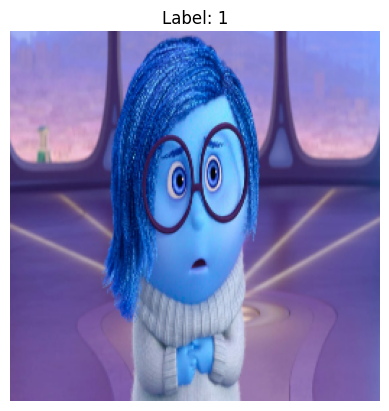

In [214]:
import matplotlib.pyplot as plt

# Shuffle the dataset to pick a random sample
shuffled_data = data.shuffle(buffer_size=1000)

# Take one random sample
for x_batch, y_batch in shuffled_data.take(1):
    random_index = tf.random.uniform(shape=[], minval=0, maxval=x_batch.shape[0], dtype=tf.int32)

    # Get the random image and its label
    random_image = x_batch[random_index].numpy()
    random_label = y_batch[random_index].numpy()

    # Plot the random image
    plt.imshow(random_image)
    plt.title(f"Label: {random_label}")
    plt.axis('off')  # Hide axis
    plt.show()

In [192]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

In [197]:
batch[0]

array([[[[0.5803922 , 0.48235294, 0.7372549 ],
         [0.5803922 , 0.48235294, 0.7372549 ],
         [0.5803922 , 0.48235294, 0.7372549 ],
         ...,
         [0.40629596, 0.6344669 , 0.9286918 ],
         [0.4064185 , 0.6392157 , 0.906587  ],
         [0.40784314, 0.6426624 , 0.8876991 ]],

        [[0.5803922 , 0.48235294, 0.7372549 ],
         [0.5803922 , 0.48235294, 0.7372549 ],
         [0.5803922 , 0.48235294, 0.7372549 ],
         ...,
         [0.40629596, 0.63549185, 0.926642  ],
         [0.4064185 , 0.6392157 , 0.906587  ],
         [0.40784314, 0.6426624 , 0.8876991 ]],

        [[0.5803922 , 0.48235294, 0.7372549 ],
         [0.5803922 , 0.48235294, 0.7372549 ],
         [0.5803922 , 0.48235294, 0.7372549 ],
         ...,
         [0.40637755, 0.6368413 , 0.9236546 ],
         [0.4066253 , 0.63908404, 0.90643674],
         [0.40804994, 0.6424556 , 0.8878809 ]],

        ...,

        [[0.8590303 , 0.8821461 , 0.88235295],
         [0.8590303 , 0.8821461 , 0.88235295]

2.2 Split Data

In [215]:
#number of batch
len(data)

12

In [216]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [217]:
train_size + val_size + test_size == len(data)

True

In [218]:
#split out data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [219]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

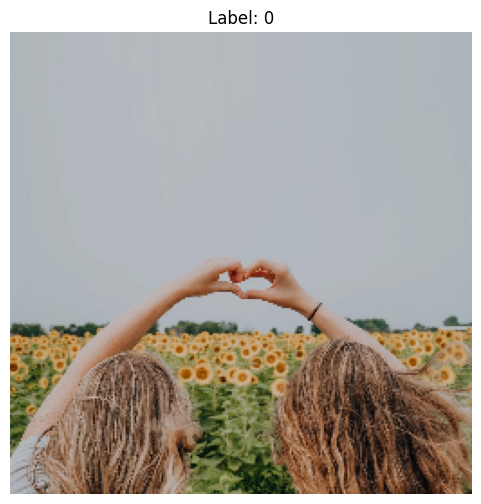

In [221]:
#plot random image
import numpy as np
import matplotlib.pyplot as plt

# Convert the dataset to a list to easily access the images
# Note: This might be inefficient if your dataset is very large, consider using batching.
images, labels = next(iter(train))

# Select a random index
random_index = np.random.randint(0, images.shape[0])

# Get the random image and label
random_image = images[random_index].numpy()
random_label = labels[random_index].numpy()

# Plot the random image
plt.figure(figsize=(6, 6))
plt.imshow(random_image)
plt.title(f'Label: {random_label}')
plt.axis('off')  # Hide axes
plt.show()

#3, Deep model

3.1 Build Deep Learning Model

In [222]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [223]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),

    Dense(1, activation='sigmoid')  # For binary classification
])

# model_2=Sequential([
#     Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
#     MaxPooling2D(),

#     Conv2D(32, (3,3), 1, activation='relu'),
#     MaxPooling2D(),

#     Conv2D(16, (3,3), 1, activation='relu'),
#     MaxPooling2D(),

#     Flatten(),

#     Dense(256, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# from tensorflow.keras.regularizers import l2  # Import l2 for L2 regularization

# # Define the regularization strength (lambda)
# l2_reg = 0.01  # You can adjust this value as needed

# # Model definition with L2 regularization
# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(l2_reg)),
#     MaxPooling2D(),

#     Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(l2_reg)),
#     MaxPooling2D(),

#     Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(l2_reg)),
#     MaxPooling2D(),

#     Flatten(),

#     Dense(256, activation='relu', kernel_regularizer=l2(l2_reg)),
#     Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_reg))  # For binary classification
# ])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [224]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [225]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_81 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_81 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_82 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_83 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_84 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,680,929 (6.41 MB)

 Trainable params: 1,680,929 (6.41 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [226]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # Import EarlyStopping and ReduceLROnPlateau
# Callbacks
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [227]:
# Training
history = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 842ms/step - accuracy: 0.4600 - loss: 0.7601 - val_accuracy: 0.6146 - val_loss: 0.6884
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 583ms/step - accuracy: 0.5708 - loss: 0.6949 - val_accuracy: 0.6458 - val_loss: 0.6703
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 432ms/step - accuracy: 0.7086 - loss: 0.6572 - val_accuracy: 0.7188 - val_loss: 0.5731
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 635ms/step - accuracy: 0.7767 - loss: 0.5799 - val_accuracy: 0.8125 - val_loss: 0.5148
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 701ms/step - accuracy: 0.7313 - loss: 0.5554 - val_accuracy: 0.8229 - val_loss: 0.4600
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 417ms/step - accuracy: 0.7838 - loss: 0.4628 - val_accuracy: 0.6875 - val_loss: 0.5882
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7448 - loss: 0.5142 - val_accuracy: 0.8542 - val_loss: 0.3483
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 0.8462 - loss: 0.3725 - val_accuracy: 0.8542 - val_loss: 

After balancing the number of happy and sad data, the model generalized perfectly.

# 3.3 Plot performance

In [228]:
def Plot_loss_accuracy(history):
  fig = plt.figure()
  plt.plot(history.history['loss'], color = 'teal' , label='loss')
  plt.plot(history.history['val_loss'], color = 'orange' , label='val_loss')
  fig.suptitle('Loss', fontsize=25)
  plt.legend(loc='upper left')
  plt.show()

  fig = plt.figure()
  plt.plot(history.history['accuracy'], color = 'teal' , label='loss')
  plt.plot(history.history['val_accuracy'], color = 'orange' , label='val_loss')
  fig.suptitle('accuracy', fontsize=25)
  plt.legend(loc='upper left')
  plt.show()

3.3.1 Plot performance of model 1

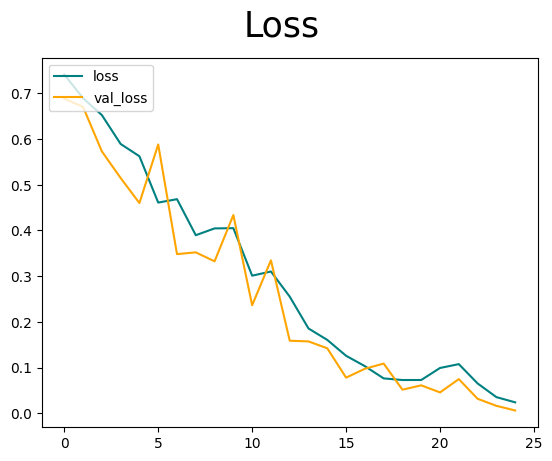

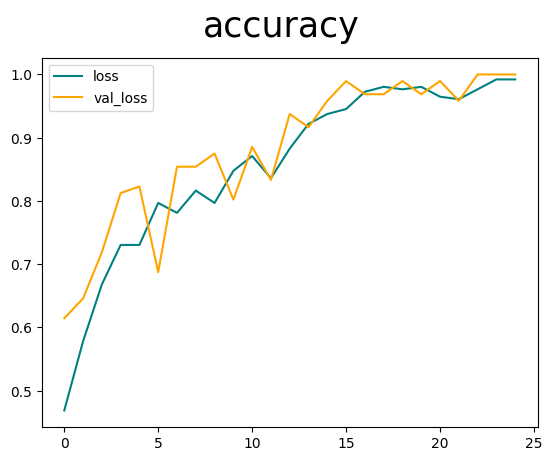

In [229]:
Plot_loss_accuracy(history)

# 4, Evaluate performance

4.1 Evaluate

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


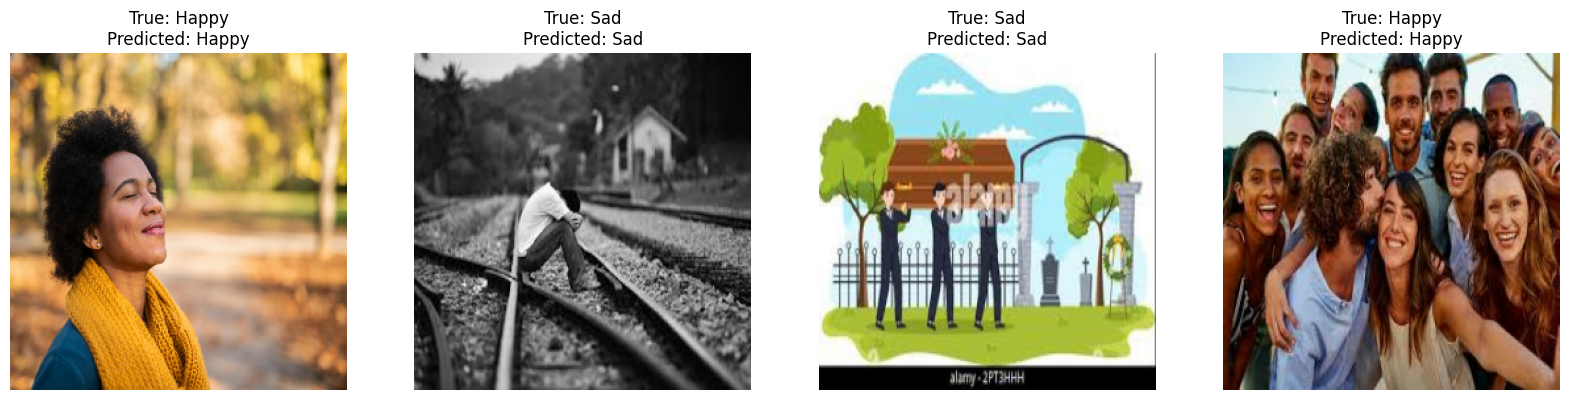

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


In [251]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Initialize metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

# Function to evaluate the model and display images with predictions and true labels
def evaluate(model, test):
    for batch in test.as_numpy_iterator():
        X, y = batch  # X is the image batch, y is the true labels
        yhat = model.predict(X)  # Predicted labels

        # Update the metrics
        pre.update_state(y, yhat)
        re.update_state(y, yhat)
        acc.update_state(y, yhat)

        # Display random images from the batch
        fig, axes = plt.subplots(ncols=4, figsize=(20, 20))

        for idx in range(4):
            img = (X[idx] * 255).astype(int)  # Rescale the image for display
            ax = axes[idx]
            ax.imshow(img)

            # Display true and predicted labels
            true_label = 'Happy' if y[idx] == 0 else 'Sad'
            predicted_label = 'Happy' if yhat[idx] < 0.5 else 'Sad'
            ax.title.set_text(f"True: {true_label}\nPredicted: {predicted_label}")
            ax.axis('off')  # Hide the axis

        plt.show()  # Show the plot with images

    # Print precision, recall, and accuracy after processing all batches
    print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

# Call the evaluation function
evaluate(model, test)

In [99]:
# evaluate model 1
evaluate(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
 Precision: 1.0, Recall: 1.0, Acuracy: 1.0


#Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


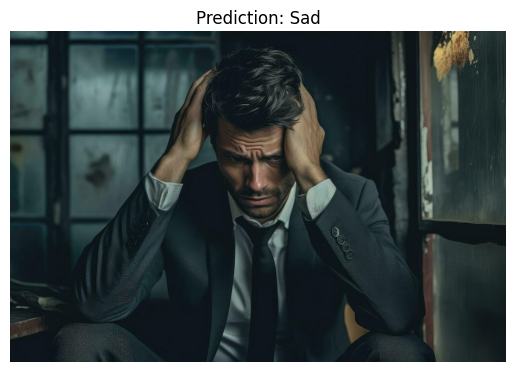

Raw model output: 0.9999978542327881


In [256]:
# Function to load and preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image from BGR (OpenCV format) to RGB (for proper color display)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to (256, 256)
    resized_img = tf.image.resize(img_rgb, (256, 256))

    # Normalize the image (scaling pixel values to [0, 1])
    resized_img = resized_img / 255.0

    # Expand dimensions to match the input shape expected by the model (1, 256, 256, 3)
    expanded_img = np.expand_dims(resized_img, axis=0)

    return expanded_img, img_rgb  # Return both resized and original image for display

# Function to predict whether the image is "Happy" or "Sad"
def predict_emotion(model, image_path):
    # Preprocess the image
    processed_img, original_img = preprocess_image(image_path)

    # Make a prediction using the model
    prediction = model.predict(processed_img)

    # Convert prediction to label
    label = "Happy" if prediction < 0.5 else "Sad"

    # Display the image and the prediction result
    plt.imshow(original_img)
    plt.title(f"Prediction: {label}")
    plt.axis('off')  # Hide the axis
    plt.show()

    # Print the raw prediction value (probability)
    print(f"Raw model output: {prediction[0][0]}")

# Example usage:
# Pass the path to your image file here
image_path = '/content/business-man-stressed.jpeg'  # Replace with the path to your test image
predict_emotion(model, image_path)


In [257]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models', "happysadmodel_1.h5"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


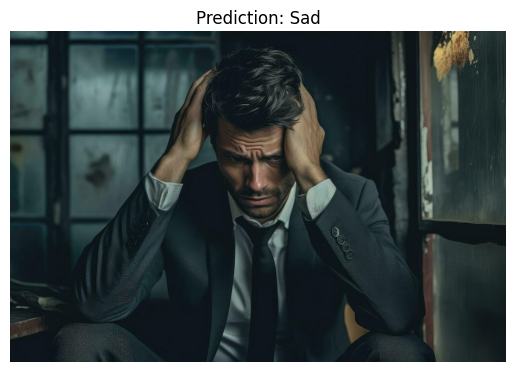

Raw model output: 0.9999978542327881


In [258]:
new_model = load_model(os.path.join('models', "happysadmodel_1.h5"))
image_path = '/content/business-man-stressed.jpeg'  # Replace with the path to your test image
predict_emotion(new_model, image_path)

#Let's check how the model performs with the augmented data.

2.3 Data Augmentation

In [162]:
def augment(image, label):
    """Augments an image and label."""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = tf.image.random_saturation(image, 0.8, 1.2)
    image = tf.image.random_hue(image, max_delta=0.2)


    return image, label

# Apply the augmentation function to the dataset
train_augmented = train.map(augment)

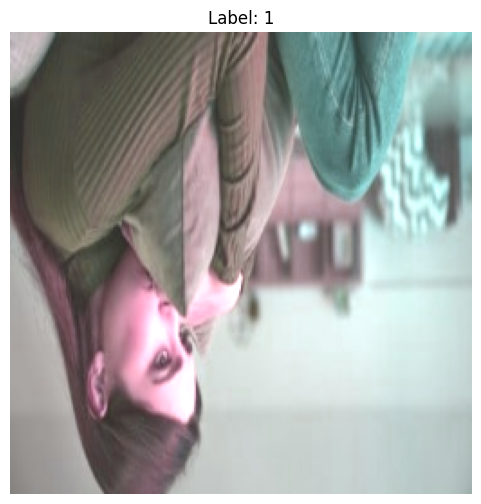

In [163]:
#plot random image
import numpy as np
import matplotlib.pyplot as plt

# Convert the dataset to a list to easily access the images
# Note: This might be inefficient if your dataset is very large, consider using batching.
images, labels = next(iter(train_augmented))

# Select a random index
random_index = np.random.randint(0, images.shape[0])

# Get the random image and label
random_image = images[random_index].numpy()
random_label = labels[random_index].numpy()

# Plot the random image
plt.figure(figsize=(6, 6))
plt.imshow(random_image)
plt.title(f'Label: {random_label}')
plt.axis('off')  # Hide axes
plt.show()

In [164]:
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),

    Dense(1, activation='sigmoid')  # For binary classification
])

In [165]:
model_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [166]:
model_2.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_76 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_76 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_77 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_78 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_79 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 12, 12, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_80 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,137 (1.55 MB)

 Trainable params: 407,137 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [167]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # Import EarlyStopping and ReduceLROnPlateau
# Callbacks
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=1e-6)
# early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [168]:
# Training
history_2 = model_2.fit(train_augmented, epochs=40, validation_data=val, callbacks=[tensorboard_callback, lr_reduction])

Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 486ms/step - accuracy: 0.4713 - loss: 0.7003 - val_accuracy: 0.5208 - val_loss: 0.6878 - learning_rate: 0.0010
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 655ms/step - accuracy: 0.5620 - loss: 0.6811 - val_accuracy: 0.7083 - val_loss: 0.6762 - learning_rate: 0.0010
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 683ms/step - accuracy: 0.6812 - loss: 0.6610 - val_accuracy: 0.5312 - val_loss: 0.6651 - learning_rate: 0.0010
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 536ms/step - accuracy: 0.6434 - loss: 0.6589 - val_accuracy: 0.7188 - val_loss: 0.6302 - learning_rate: 0.0010
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 741ms/step - accuracy: 0.6332 - loss: 0.6360 - val_accuracy: 0.5938 - val_loss: 0.6584 - learning_rate: 0.0010
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 474ms/step - accuracy: 0.6725 - loss: 0.6186 - val_accuracy: 0.6771 - val_loss: 0.6179 - learning_rate: 2.0000e-04
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6786 - loss: 0.6059 - val_accuracy:

After balancing the number of happy and sad data, the model_2 with augmented data also generalized perfectly.

3.3.2 Plot performance of model 2

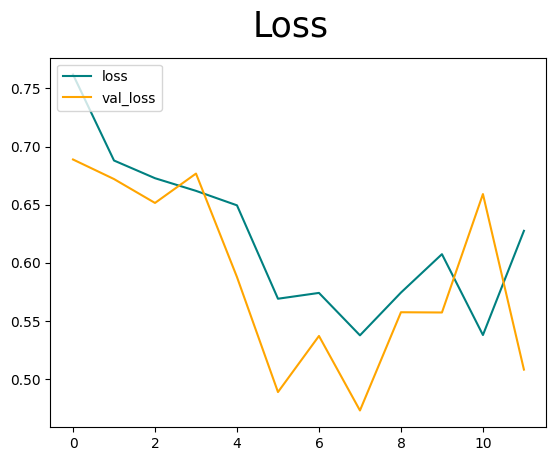

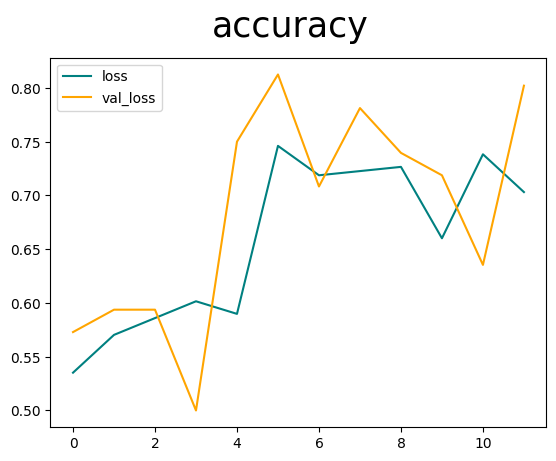

In [94]:
Plot_loss_accuracy(history_2)


#when I use augmented data the model is underfitting